# Prediction using supervised ML


This is simple linear regression problem and I have to predict the % of marks scored by a student based on the no. of hours studied by him/her.


In [3]:
#Lets us begin by importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Getting the data
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


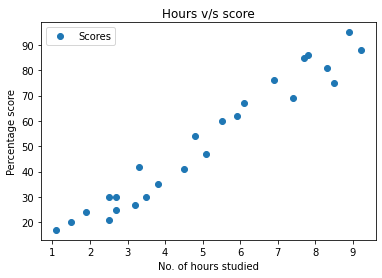

In [8]:
#Lets plot the data to see if there exits any visible relationship between the two variables
data.plot(x='Hours',y='Scores',style='o')
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage score")
plt.title('Hours v/s score')
plt.show()

In [20]:
# There is a visible positive linear relationship
# Now dividing the data as inputs and outputs
x=data.iloc[:,:-1].values  #input
y=data.iloc[:,1].values   #output

In [21]:
#Splitting the data into training and test sets using Scikit learn's built in method
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

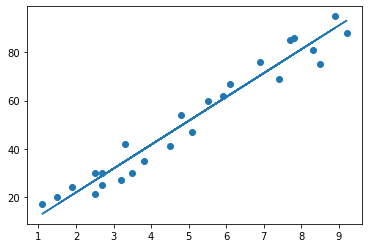

In [22]:
# Lets train the data
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 
# Now plotting the regression line
line=regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)   #plotting the test data
plt.plot(x,line);
plt.show()

In [24]:
# Now predicting the scores
y_predict=regressor.predict(x_test)
# Comparing actual and predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [36]:
# Answering the asked question, when hours=9.25/day
hours = 9.25
hours=np.array(hours)
score = regressor.predict(hours.reshape(-1,1))
print("Expected Score = {}".format(score[0]))


Expected Score = 93.69173248737538


In [32]:
#predicting the performance of the model by using Mean absolute error.
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predict)) 

Mean Absolute Error: 4.183859899002975
